In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
d1=pd.read_csv('diabetes.csv')

In [4]:
d1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


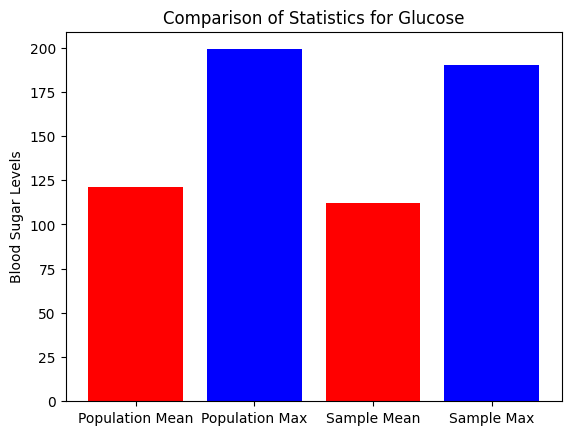

In [5]:
np.random.seed(930)
sample = d1.sample(25)

population_mean_glucose = d1['Glucose'].mean()
population_max_glucose = d1['Glucose'].max()
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

labels = ['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max']
glucose_values = [population_mean_glucose, population_max_glucose, sample_mean_glucose, sample_max_glucose]
plt.bar(labels, glucose_values, color=['red', 'blue', 'red', 'blue'])
plt.title('Comparison of Statistics for Glucose')
plt.ylabel('Blood Sugar Levels')
plt.show()

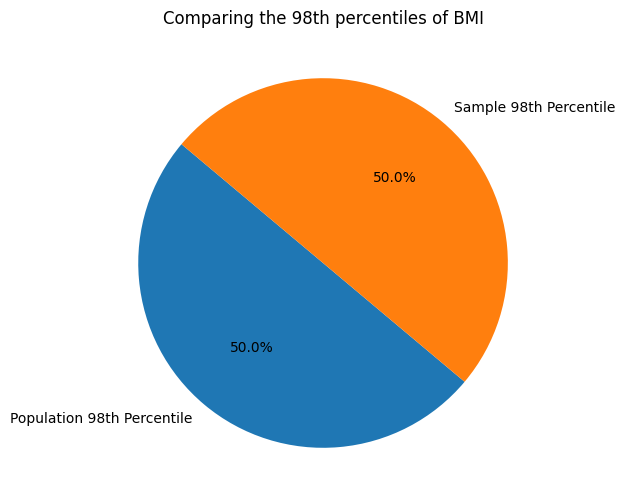

In [6]:
population_percentile = np.percentile(d1['BMI'], 98)
sample_percentile = np.percentile(d1['BMI'], 98)
labels = ['Population 98th Percentile', 'Sample 98th Percentile']
values = [population_percentile, sample_percentile]

plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Comparing the 98th percentiles of BMI')
plt.show()

In [7]:

bootstrap_samples = 500
sample_size = 150
bootstrap_means = np.zeros(bootstrap_samples)
bootstrap_std_devs = np.zeros(bootstrap_samples)
bootstrap_percentiles = np.zeros(bootstrap_samples)
for i in range(bootstrap_samples):
    bootstrap_sample = d1['BloodPressure'].sample(sample_size, replace=True)
    bootstrap_means[i] = bootstrap_sample.mean()
    bootstrap_std_devs[i] = bootstrap_sample.std()
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample, 98)
population_mean = d1['BloodPressure'].mean()
population_std_dev = d1['BloodPressure'].std()
population_percentile = np.percentile(d1['BloodPressure'], 98)
bmean=np.mean(bootstrap_means)
bsd=np.mean(bootstrap_std_devs)
bp=np.mean(bootstrap_percentiles)

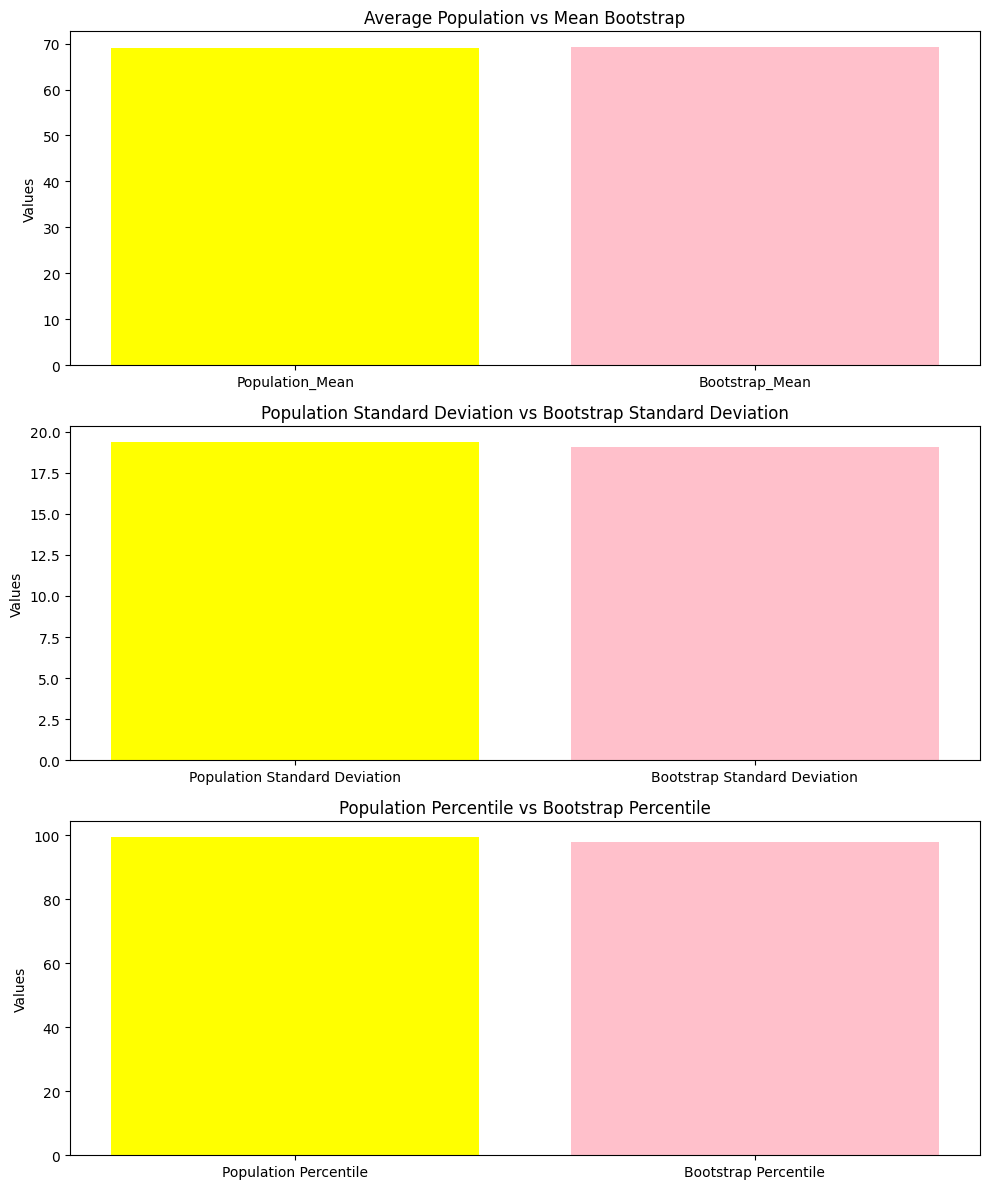

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))
axs[0].bar(['Population_Mean', 'Bootstrap_Mean'], [population_mean, bmean], color=['yellow', 'pink'])
axs[0].set_ylabel('Values')
axs[0].set_title('Average Population vs Mean Bootstrap')
axs[1].bar(['Population Standard Deviation', 'Bootstrap Standard Deviation'], [population_std_dev, bsd], color=['yellow', 'pink'])
axs[1].set_ylabel('Values')
axs[1].set_title('Population Standard Deviation vs Bootstrap Standard Deviation')
axs[2].bar(['Population Percentile', 'Bootstrap Percentile'], [population_percentile, bp], color=['yellow', 'pink'])
axs[2].set_ylabel('Values')
axs[2].set_title('Population Percentile vs Bootstrap Percentile')
plt.tight_layout()
plt.show()